# Day 25 In-class Assignment: A simple model for global temperature

### <p style="text-align: right;"> &#9989; Put your name here.</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

<img src="https://i.imgur.com/DyApJbB.png" width=400px>

## Goals for today's in-class assignment

* Use the simple model you implemented in the pre-class assignment, as well as the datasets that you analyzed in the previous class period, to make models that predict global climate change under a variety of circumstances.

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.  If you haven't completed all sections of the assignment, you still need to upload something!

**In today's class**, we are going to work with the simple climate model you implemented in the pre-class assignment, as well as some of the datasets that you analyzed in the previous class period.  

---
&#9989;&nbsp; **Before we do anything else,** check with the members of your group to make sure that you have correctly implemented the model - in particular, that you get the correct increase in temperature for the assumed carbon input!

## Step 1: Verify the model parameter using data

In the pre-class assignment, we started the model in the year 2000 with a CO$_2$ concentration of 368 parts per million (ppm) and an average global temperature was 15° C (59° F).  We also assumed that the climate sensitivity factor, S, in the model is 3° C.

&#9989;&nbsp; But now, you're going to calculate temperatures from 1960-present **using only the CO$_2$ concentration data from that time period**. Then you will **plot your calculated temperature values along with the measured values from ```GLB.Ts.csv``` to see how they compare**.

The CO$_2$ concentration values you'll use to predict the temperature are stored in ```co2_mm_mlo.txt```, so you'll need to **load this dataset as well to use it for calculating your temperature values**.

You will compare those computed temperatures with the measured values in the ```GLB.Ts.csv``` file.  Remember that this stores temperature anomaly values in $0.01$ K, which you need to convert like you did in our last class period. Also, assume that the average global temperature  was **14.3° C** when the CO$_2$ started in ~1960 (since the data just provides the temperature *difference*, not the absolute temperature, you'll need to add this value to the anomaly data).

Once you've computed the temperature values using the CO$_2$ data, make your best estimate of the climate sensitivity factor **using the observed temperature data** over the period when you have both temperature and CO$_2$ concentration (approx. 1960 - present). You can do this by overplotting your modeled temperature values with the actual temperatures and changing the sensitivity factor to see how it changes the results.

**Was our original estimate of S = 3° C a reasonable choice?** What happens when you make this value bigger/smaller?

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

In [18]:
# Put your code here
co2_mm = np.loadtxt("co2_mm_mlo.txt",skiprows=72,unpack=True)
global_temp_recent = np.loadtxt('GLB.Ts.csv',skiprows=1,unpack=True,delimiter=',')
global_temp_recent[13] /= 100.0
co2_mm.T[co2_mm[2]>=1960]

array([[ 1.960000e+03,  1.000000e+00,  1.960042e+03, ...,  3.164300e+02,
         3.165100e+02, -1.000000e+00],
       [ 1.960000e+03,  2.000000e+00,  1.960125e+03, ...,  3.169700e+02,
         3.164700e+02, -1.000000e+00],
       [ 1.960000e+03,  3.000000e+00,  1.960208e+03, ...,  3.175800e+02,
         3.164900e+02, -1.000000e+00],
       ...,
       [ 2.017000e+03,  1.200000e+01,  2.017958e+03, ...,  4.068200e+02,
         4.075600e+02,  3.100000e+01],
       [ 2.018000e+03,  1.000000e+00,  2.018042e+03, ...,  4.079800e+02,
         4.077700e+02,  2.900000e+01],
       [ 2.018000e+03,  2.000000e+00,  2.018125e+03, ...,  4.083500e+02,
         4.076100e+02,  2.800000e+01]])

In [5]:
def Ti(t0, S, C,C0):
    
    return t0+S*np.log2(C/C0)

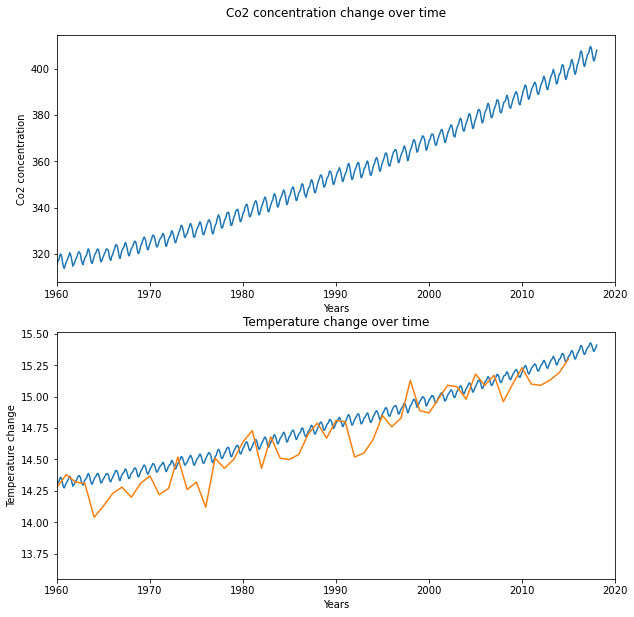

In [28]:
temp =[14.3]
C=9
S=3.0
K=2.3
year=[co2_mm[2][0]]
co2=[co2_mm[4][0]]

time=co2_mm.T[co2_mm[2]>=1960]


for i in range(1,len(co2_mm[2])-1):
    year.append(co2_mm[2][i])
    co2.append(co2_mm[4][i])
    newtemp=temp[0]+S*math.log2(co2[-1]/co2[0])
    temp.append(newtemp)
    
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(year,co2)
plt.xlim(1960,2020)
plt.ylabel("Co2 concentration")
plt.xlabel("Years")
plt.title("Co2 concentration change over time",y=1.05)

plt.subplot(2,1,2)
plt.plot(year,temp)
plt.xlim(1960,2020)
plt.ylabel("Temperature change")
plt.xlabel("Years")
plt.title("Temperature change over time")
plt.plot(global_temp_recent[0],global_temp_recent[13]+14.3)

<font size="+3">&#9998;</font> *Comment on our choice of value for the sensitivity factor, S.*

---
## Step 2: Make predictions for the future

Now, let's go back to our original "very, very simple model" and modify it to make it more sophsticated, and to make some predictions for the future.

&#9989;&nbsp; Consider the following scenarios, and predict global temperature from the current 2000 until the year 2100. **As you did in the pre-class assignment, start with a CO$_2$ concentration of 368 parts per million (ppm) and an average global temperature of 15° C (59° F).**

1.  **Baseline model:** A constant 9 gigatons of carbon per year is put into the atmosphere by humans (this is the model you implemented in your pre-class assignment)
2.  **Growth model:** The amount of carbon put into the atmosphere actually grows: starting at 7 gigatons/year in 2000, and increasing by 0.1 gigatons/year for every additional year thereafter (to represent increased reliance on fossil fuels).
3.  **"Get it under control" model:** The amount of carbon put into the atmosphere starts at 7 gigatons/year in 2000, increases by 0.1 gigatons/year until 2030, and then decreases by 0.1 gigatons/year until 2100.
4.  **"Carbon sequestration" model:** The amount of carbon put into the atmosphere starts at 7 gigatons/year in 2000, increases by 0.1 gigatons/year until 2030, and then decreases by 0.5 gigatons/year until it reaches -5 gigatons/year (indicating that we have developed some means of "sequestering" carbon -- in other words, removing it from the atmosphere.
5.  **Your own scenario:** Given your thoughts about climate change and humanity's ability to reduce CO$_2$ emission, devise your own scenario!

Make plots of the global CO$_2$ concentration, average global temperature, and the rate of human carbon emission each year for each of these scenarios, plotted on the same subplot.  Create a key for the plots so we can tell which lines correspond to which scenario!

Also, in what scenarios do we avoid increasing global temperatues by no more than 2° C from the current temperature?  Experts consider that to be the global temperature increase that will have [catastrophic climate consequences](http://www.pbs.org/newshour/bb/why-2-degrees-celsius-is-climate-changes-magic-number/), and thus is a critical target for climate models.


[7, 7.1]
[7, 7.1, 7.199999999999999]
[7, 7.1, 7.199999999999999, 7.299999999999999]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999, 7.499999999999998]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999, 7.499999999999998, 7.599999999999998]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999, 7.499999999999998, 7.599999999999998, 7.6999999999999975]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999, 7.499999999999998, 7.599999999999998, 7.6999999999999975, 7.799999999999997]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999, 7.499999999999998, 7.599999999999998, 7.6999999999999975, 7.799999999999997, 7.899999999999997]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.399999999999999, 7.499999999999998, 7.599999999999998, 7.6999999999999975, 7.799999999999997, 7.899999999999997, 7.9999999999999964]
[7, 7.1, 7.199999999999999, 7.299999999999999, 7.3

Text(0.5, 1.0, 'Carbon emission over time')

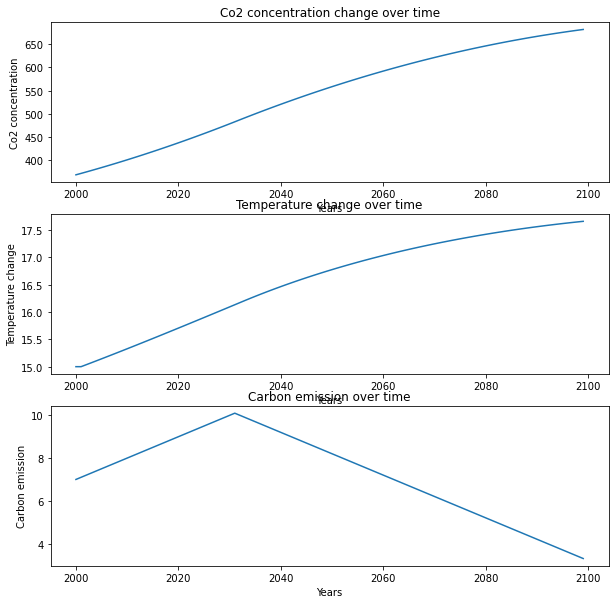

In [35]:
#"Get it under control" model
init_co2=368
init_temp =15
C0=7
S=3
K=2.3

time=np.arange(2000,2100)
co2=[]
temp=[]
co2.append(init_co2)
temp.append(init_temp)
C=[]
C.append(C0)

for i in range(len(time)-1):
    if i <=30:
        C_new=C[i]+0.1
        C.append(C_new)
    if i > 30:
        C_new2=C[i]-0.1
        C.append(C_new2)
    print(C)
    co2_new=co2[i]+(C[i]/K)
    co2.append(co2_new)
    temp_new=Ti(temp[0],S,co2[i],co2[0])
    temp.append(temp_new)
    
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(time,co2)
plt.ylabel("Co2 concentration")
plt.xlabel("Years")
plt.title("Co2 concentration change over time")

plt.subplot(3,1,2)
plt.plot(time,temp)
plt.ylabel("Temperature change")
plt.xlabel("Years")
plt.title("Temperature change over time")

plt.subplot(3,1,3)
plt.plot(time,C)
plt.ylabel("Carbon emission")
plt.xlabel("Years")
plt.title("Carbon emission over time")

Text(0.5, 1.0, 'Carbon emission over time')

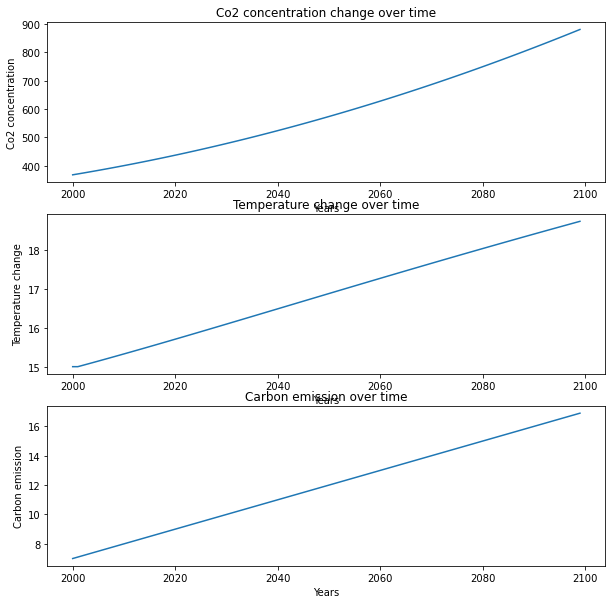

In [37]:
#Growth model
init_co2=368
init_temp =15
C0=7
S=3
K=2.3

time=np.arange(2000,2100)
co2=[]
temp=[]
co2.append(init_co2)
temp.append(init_temp)
C=[]
C.append(C0)

for i in range(len(time)-1):
    C_new=C[i]+0.1
    C.append(C_new)
    co2_new=co2[i]+(C[i]/K)
    co2.append(co2_new)
    temp_new=Ti(temp[0],S,co2[i],co2[0])
    temp.append(temp_new)
    
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
plt.plot(time,co2)
plt.ylabel("Co2 concentration")
plt.xlabel("Years")
plt.title("Co2 concentration change over time")

plt.subplot(3,1,2)
plt.plot(time,temp)
plt.ylabel("Temperature change")
plt.xlabel("Years")
plt.title("Temperature change over time")

plt.subplot(3,1,3)
plt.plot(time,C)
plt.ylabel("Carbon emission")
plt.xlabel("Years")
plt.title("Carbon emission over time")

In [53]:
# Put your code here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
global_temp_recent = np.loadtxt('GLB.Ts.csv',skiprows=1,unpack=True,delimiter=',')
global_temp_recent[13] /= 100.0
co2 = np.loadtxt('co2_mm_mlo.txt',unpack=True)
#co2[,:0]
co2 = co2.T[co2[2]>=1960].T
global_temp_recent = global_temp_recent.T[global_temp_recent[0]>=1960].T
global_temp_recent[13]

array([-0.02,  0.08,  0.02,  0.01, -0.26, -0.17, -0.07, -0.02, -0.1 ,
        0.01,  0.07, -0.08, -0.03,  0.22, -0.04,  0.02, -0.18,  0.21,
        0.13,  0.2 ,  0.34,  0.43,  0.13,  0.38,  0.21,  0.2 ,  0.24,
        0.4 ,  0.49,  0.37,  0.51,  0.5 ,  0.22,  0.25,  0.36,  0.55,
        0.46,  0.53,  0.83,  0.59,  0.57,  0.68,  0.79,  0.78,  0.68,
        0.88,  0.79,  0.87,  0.66,  0.8 ,  0.93,  0.8 ,  0.79,  0.83,
        0.89,  1.  ])

In [55]:
def T_curr(S, T0, Co, C):
    return T0+S*np.log2(C/Co)

316.43


E:\RStudioTEMP\ipykernel_1872\879947316.py:64: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


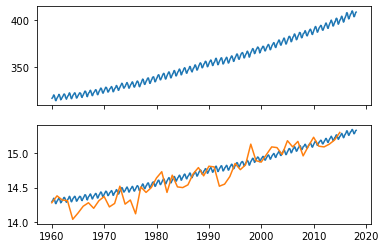

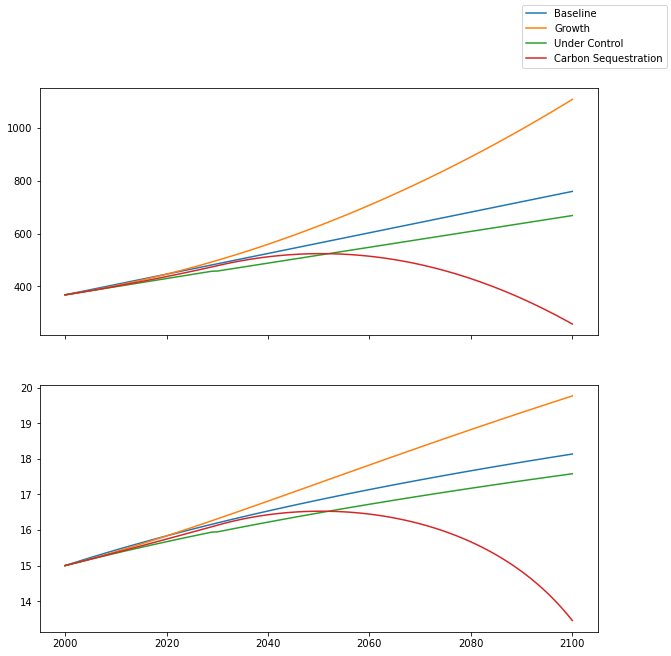

In [56]:
Co = co2[4][0]
print(Co)
T0 = 14.3
S = 2.8
time = np.linspace(2000,2100,401)
Cn = [Co+9*(i-1960)/2.3 for i in co2[2]]
Cn
temper = [T_curr(S,T0,Co,C) for C in co2[4]]
f,axs = plt.subplots(2, sharex=True)
axs[0].plot(co2[2],co2[4])
axs[1].plot(co2[2],temper)
axs[1].plot(global_temp_recent[0],global_temp_recent[13]+14.3)
# Put your code here
Co = 368
T0 = 15
S = 3
time = np.linspace(2000,2100,101)
Cn = [Co+9*(i-2000)/2.3 for i in time]
Cn
temper = [T_curr(S,T0,Co,C) for i,C in zip(time,Cn)]
#temper = [T_curr(S,i.Co,C) for i in time]
growth = [.1*(i-2000) for i in time]
Cg = [Co+(7+g)*(i-2000)/2.3 for i,g in zip(time,growth)]
temperG = [T_curr(S,T0,Co,C) for i,C in zip(time,Cg)]
controlG = []
for i in time:
    if(i<2030):
        controlG.append(.1)
    else:
        controlG.append(-.1)
Cc = []
for i,grow in zip(time,controlG):
    Cc.append(Co+(7+grow)*(i-2000)/2.3)
#Cc = [Co+(7+g)*(i-2000)/2.3 for i,g in zip(time[0:30],growth[0:30])]
temperC = [T_curr(S,T0,Co,C) for i,C in zip(time,Cc)]
#for i in zip(time):
#    Cg.append(Co)
controlS = [7]
for i in time:
    if(i<2030):
        controlS.append(controlS[-1]+.1)
    elif(i>-5):
        try:
            controlS.append(controlS[-1]-.5)
        except:
            controlS.append(-5)
    else:
        controlS.append(-5)
Cs = [Co]
for i,grow in zip(time[1:],controlS):
    Cs.append(Cs[-1]+(grow)/2.3)
temperS = [T_curr(S,T0,Co,C) for i,C in zip(time,Cs)]
f,axs = plt.subplots(2, sharex=True,figsize=(10,10))
axs[0].plot(time,Cn)
axs[1].plot(time,temper,label="Baseline")
axs[0].plot(time,Cg)
axs[1].plot(time,temperG,label="Growth")
axs[0].plot(time,Cc)
axs[1].plot(time,temperC,label="Under Control")
axs[0].plot(time,Cs)
axs[1].plot(time,temperS,label="Carbon Sequestration")
#axs[1].show()
f.legend()
f.show()
#time

## Step 3:  How does this impact sea level?

One major concern with regards to climate change is that global warming will cause a rise in [sea level](https://climate.nasa.gov/vital-signs/sea-level/), which comes from both melting glaciers and ice caps and from the expansion of water as it warms.  This will have significant consequences for ecosystems and also for humans - most of the Earth's population lives close to the ocean, and increased sea level will increase the dangers from flooding and the impact of hurricanes and cyclones, and will displace huge numbers of people in low-lying countries from their homes.

A recent paper by [Levermann et al. (2013, PNRAS, 110, 13745)](http://www.pik-potsdam.de/~anders/publications/levermann_clark13.pdf) shows calculations that estimate this effect.  Their best prediction is that, over long time scales, **the sea level rise will be approximately 2.3 meters per °C of temperature increase beyond the current value**, although this is substantially uncertain (by roughly a factor of two in either direction).  They also caution that this is the **long-term outcome**, with sea level rise trailing the increase in atmospheric CO$_2$ concentration by some time because it will take some time for the oceans to warm up and the Antarctic ice sheet to melt.

**Using the Levermann data, make three estimates per model from Step 2:** 

1. an "optimistic" model assuming 1 meter of sea level rise per °C of temperature increase beyond the present
2. a "realistic" model assuming 2 meters of rise per °C of temperature increase
3. a "pessimistic" model assuming 4 meters of rise per °C of temperature increase.  

Given [this graph of human population distribution by altitude](http://www.radicalcartography.net/index.html?howhigh), how much of the Earth's population might be affected by each of these models?

E:\RStudioTEMP\ipykernel_1872\3704334303.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


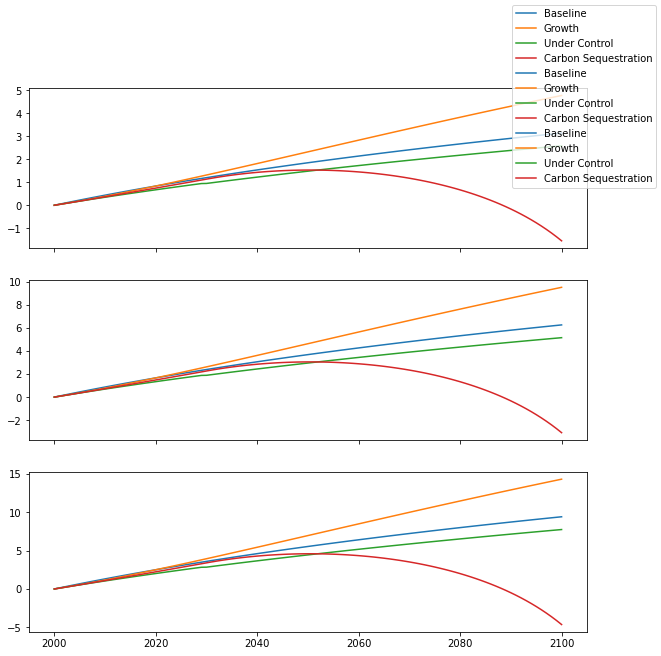

In [57]:
# Put your code here
# Put your code here
temper = np.array(temper)
temperG = np.array(temperG)
temperC = np.array(temperC)
temperS = np.array(temperS)
f,axs = plt.subplots(3, sharex=True,figsize=(10,10))
axs[0].plot(time,(temper-15),label="Baseline")
axs[0].plot(time,(temperG-15),label="Growth")
axs[0].plot(time,temperC-15,label="Under Control")
axs[0].plot(time,temperS-15,label="Carbon Sequestration")

axs[1].plot(time,(temper-15)*2,label="Baseline")
axs[1].plot(time,(temperG-15)*2,label="Growth")
axs[1].plot(time,(temperC-15)*2,label="Under Control")
axs[1].plot(time,(temperS-15)*2,label="Carbon Sequestration")

axs[2].plot(time,(temper-15)*3,label="Baseline")
axs[2].plot(time,(temperG-15)*3,label="Growth")
axs[2].plot(time,(temperC-15)*3,label="Under Control")
axs[2].plot(time,(temperS-15)*3,label="Carbon Sequestration")
f.legend()
f.show()

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [58]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

# Last In-Class Assignment for this Course--CONGRATULATIONS!!!
<img src="https://media.giphy.com/media/kyLYXonQYYfwYDIeZl/giphy.gif" width=300>